In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

### Problem 1 to 2:

- Dataset link: https://rb.gy/gsmddu
- Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations. Then, you can customize it as your wish.

### Problem-1: Make a subplots which have 2 plots.
### For the first chart, draw a scatter plot "Monitored Cap.(MW)" vs "Total Cap. Under Maintenance (MW)" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
### For the second chart, draw a scatter plot "Monitored Cap. (MW)" vs "Actual(MU)" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.

In [18]:
power = pd.read_csv(r"D:\Jupyter\PowerGeneration - PowerGeneration.csv")
power.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.0,0.0
1,2017-09-01,Haryana,2720.0,2470.0,0.0,2470.0,0,28,7,-21.8,0.0


In [15]:
frequent = power["Power Station"].value_counts().head().index
#print(frequent)
frequent_df = power[power["Power Station"].isin(frequent)]
frequent_df.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
28,2017-09-01,NHPC,4154.2,217.0,0.0,206.0,0,69,75,6.01,0.0
30,2017-09-01,NPCIL,1520.0,0.0,0.0,0.0,0,30,35,5.21,0.0


In [25]:
frequent

Index(['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'JSWEL'], dtype='object')

In [31]:
frequent_df["color"] = frequent_df.replace({'NTPC Ltd.':0,'NHPC':1, 'NPCIL':2, 'GMR ENERG':3, 'JSWEL':4})["Power Station"]
frequent_df.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,color
28,2017-09-01,NHPC,4154.2,217.0,0.0,206.0,0,69,75,6.01,0.0,1
30,2017-09-01,NPCIL,1520.0,0.0,0.0,0.0,0,30,35,5.21,0.0,2


Text(0, 0.5, 'Actual(MU)')

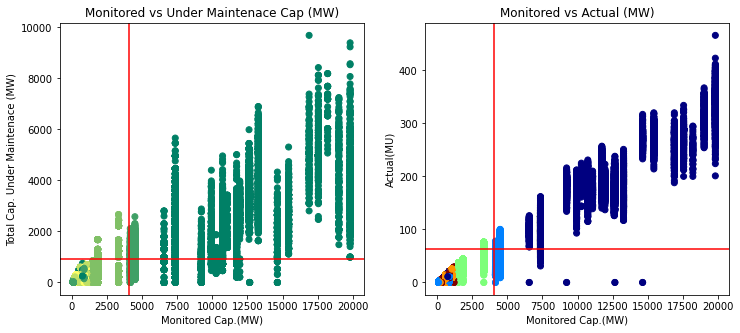

In [51]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax[0].scatter(frequent_df["Monitored Cap.(MW)"],frequent_df["Total Cap. Under Maintenace (MW)"],c=frequent_df["color"],cmap="summer")
ax[0].axhline(frequent_df["Total Cap. Under Maintenace (MW)"].mean(),color="red")
ax[0].axvline(frequent_df["Monitored Cap.(MW)"].mean(),color="red")
ax[0].set_title("Monitored vs Under Maintenace Cap (MW)")
ax[0].set_xlabel("Monitored Cap.(MW)")
ax[0].set_ylabel("Total Cap. Under Maintenace (MW)")

ax[1].scatter(frequent_df["Monitored Cap.(MW)"],frequent_df["Actual(MU)"],c=frequent_df["color"],cmap="jet")
ax[1].axhline(frequent_df["Actual(MU)"].mean(),color="red")
ax[1].axvline(frequent_df["Monitored Cap.(MW)"].mean(),color="red")
ax[1].set_title("Monitored vs Actual (MW)")
ax[1].set_xlabel("Monitored Cap.(MW)")
ax[1].set_ylabel("Actual(MU)")

### Problem-2: Draw a 3D Scatter plot between "Monitored Cap.(MW)", "Total Cap. Under Maintenace (MW)" and "Forced Maintanence(MW)"

In [ ]:
encoder = LabelEncoder()
power["color"] = encoder.fit_transform(power["Power Station"])

Text(0.5, 0, 'Forced Maintanence(MW)')

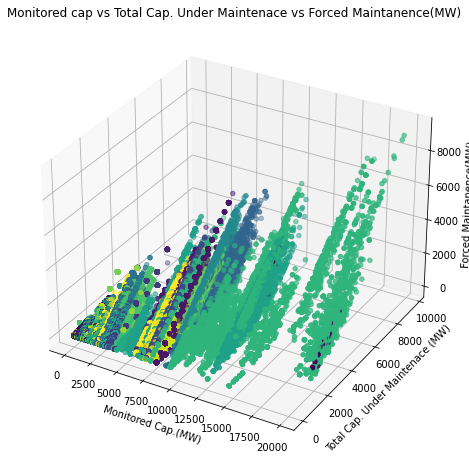

In [68]:
fig = plt.figure(figsize=(14,8))
#ax = plt.subplot(projection="3d")
ax = fig.add_subplot(projection="3d")
ax.scatter3D(power["Monitored Cap.(MW)"],power["Total Cap. Under Maintenace (MW)"],power["Forced Maintanence(MW)"],c = power["color"])
ax.set_title("Monitored cap vs Total Cap. Under Maintenace vs Forced Maintanence(MW)")
ax.set_xlabel("Monitored Cap.(MW)")
ax.set_ylabel("Total Cap. Under Maintenace (MW)")
ax.set_zlabel("Forced Maintanence(MW)")

### Problem-3: Make a 3D Surface plot of this below mathematical equation.
- z=|x|−|y|

In [84]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
xx,yy = np.meshgrid(x,y)
#z = abs(x) - abs(y)
z = np.abs(xx) - np.abs(yy)

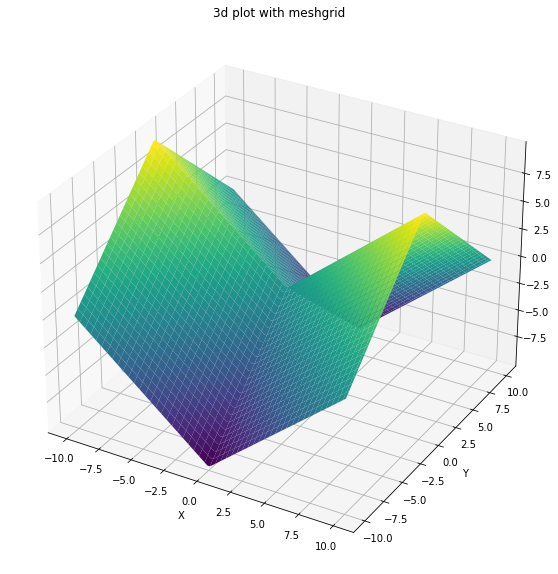

In [88]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(projection="3d")
ax.plot_surface(xx,yy,z,cmap="viridis")
ax.set_title("3d plot with meshgrid")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Problem-4: Draw the 3D Contour plot of this below equation:
- z=|x|−|y|

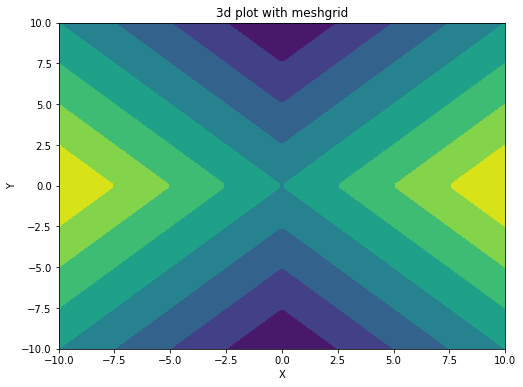

In [92]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.contourf(xx,yy,z,cmap="viridis")
ax.set_title("3d plot with meshgrid")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

### Problem-5: Draw a second type of Countour plot of the below equation:
- z=|x|−|y|

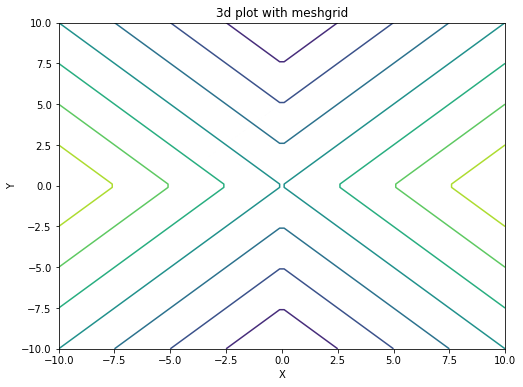

In [93]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot()
ax.contour(xx,yy,z,cmap="viridis")
ax.set_title("3d plot with meshgrid")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

### Problem 6-7
- Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link
#### Description of Dataset:

- Date: It gives the date of which stocks details are given.
- Symbol: Name of stock
- Open: It gives the opening price of stock on that date.
- High: It gives the highest price to which the stock ascened on that day.
- Low: It gives the highest price to which the stock plummeted on that day.
- Close: It gives the closing price of stock on that date.
- Volume: It gives the amount of stock traded on that date.
- VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
- Turnover:

### Problem-6 Use Pandas plot functions
### Line plot of closing value of top 5 Stocks in Year 2020.
### Take top 5 stocks based on total turnover in Year 2020

In [143]:
nifty = pd.read_csv(r"D:\Jupyter\nifty-50 - nifty-50.csv")
nifty.head(1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.4,166.0,170.0,166.0,170.0,170.0,169.52,33259,5.638122e+11,NaN


In [144]:
nifty["Date"] = pd.to_datetime(nifty["Date"])

In [145]:
nifty["Year"] = nifty["Date"].dt.year

In [146]:
temp_df = nifty.query("Year == 2020")
top5 = temp_df.groupby("Symbol")["Turnover"].sum().sort_values(ascending=False).head().index
top5

Index(['RELIANCE', 'BAJFINANCE', 'HDFCBANK', 'ICICIBANK', 'SBIN'], dtype='object', name='Symbol')

In [147]:
temp_df1 = temp_df[temp_df["Symbol"].isin(top5)].set_index("Date")
temp_df1.head(1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Year
Date,,,,,,,,,,,,,
2020-01-01,HDFCBANK,EQ,1272.1,1276.1,1280.0,1270.6,1279.0,1278.6,1276.64,1836849,2.345001e+14,46625.0,2020


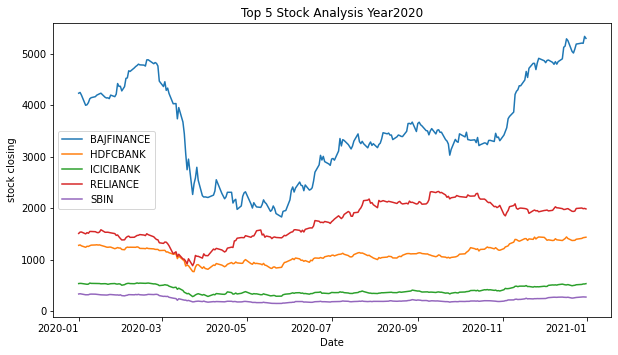

In [166]:
for name,group in temp_df1.groupby("Symbol"):
    group["Close"].plot(kind="line",label=name,figsize=(10,6),title="Top 5 Stock Analysis Year2020",ylabel="stock closing",rot=0,legend=True)

plt.show()

### Problem-7 Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
### Color on Symbol Column

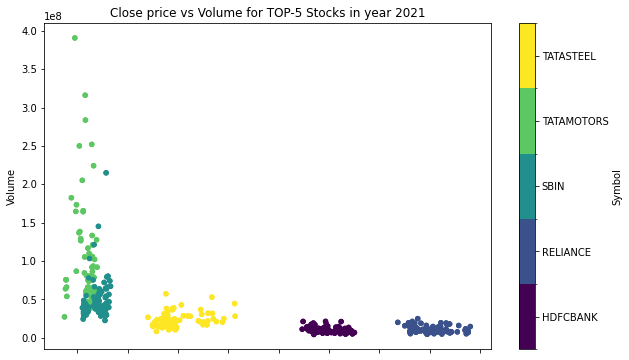

In [210]:
temp = nifty.query("Year == 2021")
top5_01 = temp.groupby("Symbol")["Turnover"].sum().sort_values(ascending=False).head().index
#print(top5_01)
final_df = temp[temp["Symbol"].isin(top5_01)].set_index("Date")
final_df["Symbol"] = final_df["Symbol"].astype("category")
#encoder = LabelEncoder()
#final_df["Encoded Symbol"] = encoder.fit_transform(final_df["Symbol"])
final_df.plot(kind="scatter",x="Close",y="Volume",c="Symbol",cmap="viridis",figsize=(10,6),legend=True,title="Close price vs Volume for TOP-5 Stocks in year 2021")
plt.show()

### Problem-8 Create a 3-D Scatter Plot using time,x,y on below synthetic data. and give color gradiant on z
### Create a 3D dataset
- time = np.linspace(0, 10, 100)
- x = np.sin(time)
- y = np.cos(time)
- z = time

### Create a DataFrame from the dataset
- data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})

In [220]:
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
data.head()

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404


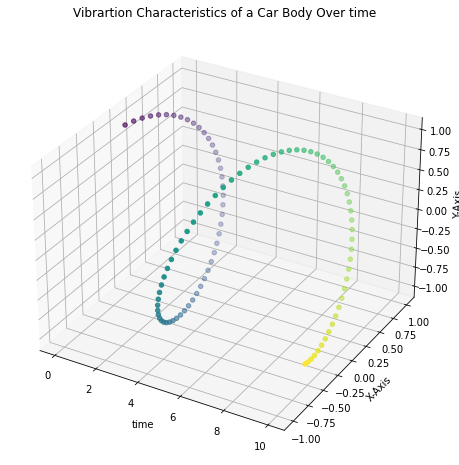

In [230]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection="3d")
ax.scatter3D(data["time"],data["x"],data["y"],c=data["z"])
ax.set_xlabel("time")
ax.set_ylabel("X-Axis")
ax.set_zlabel("Y-Axis")
ax.set_title("Vibrartion Characteristics of a Car Body Over time")
plt.show()

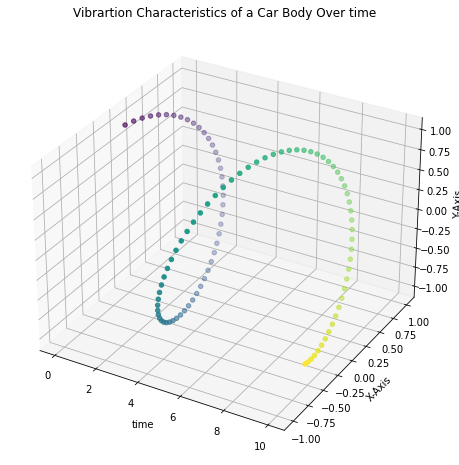

In [231]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection="3d")
ax.scatter(data["time"],data["x"],data["y"],c=data["z"])
ax.set_xlabel("time")
ax.set_ylabel("X-Axis")
ax.set_zlabel("Y-Axis")
ax.set_title("Vibrartion Characteristics of a Car Body Over time")
plt.show()

### Problem 9: Create a surface plot and the 2 types of the contour plots of the below equation.
- z=sin(np.sqrt(x2+y2))

In [237]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
XX,YY = np.meshgrid(x,y)
z = np.sin(np.sqrt(XX**2+YY**2))

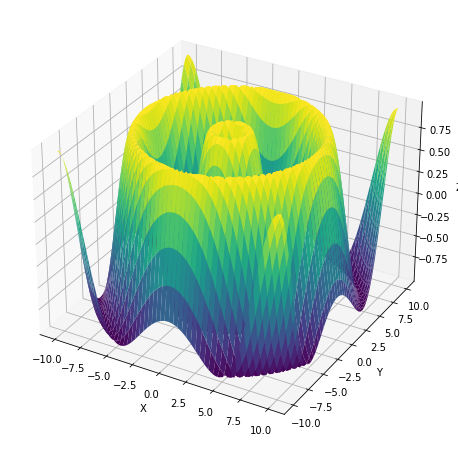

In [246]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(XX,YY,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

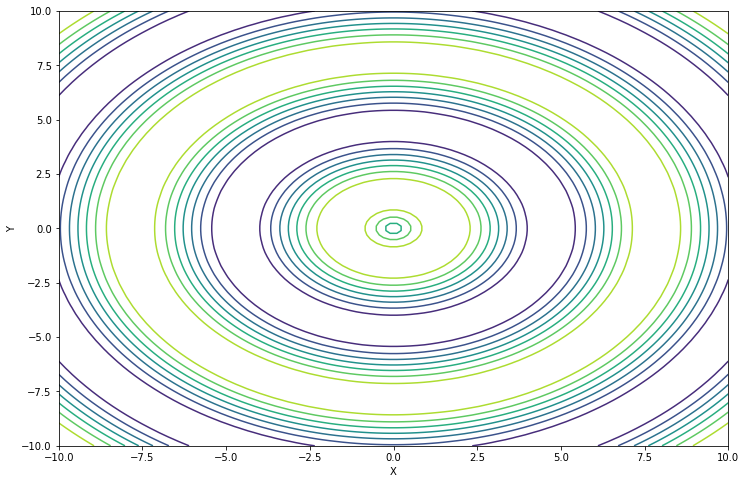

In [247]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.contour(XX,YY,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

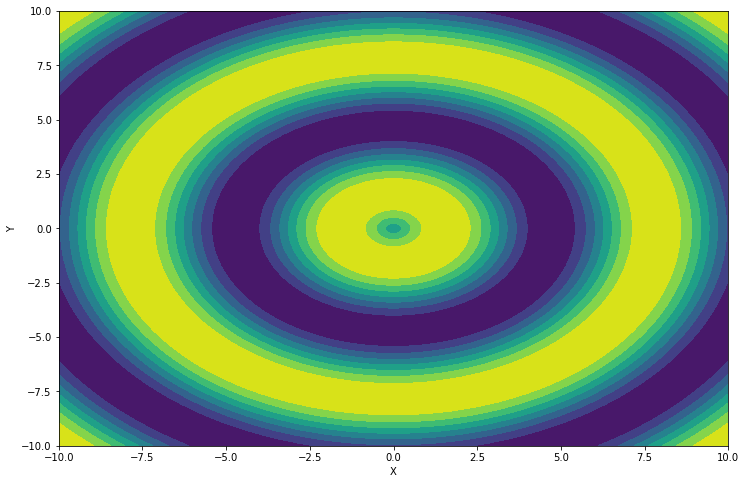

In [248]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.contourf(XX,YY,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

### Problem 10: Create a surface plot and the 2 types of the contour plots of the below equation.

In [ ]:
z=tan(log2(x2+y2)

In [250]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
xx,yy = np.meshgrid(x,y)
z = np.tan(np.log2(xx**2+yy**2))

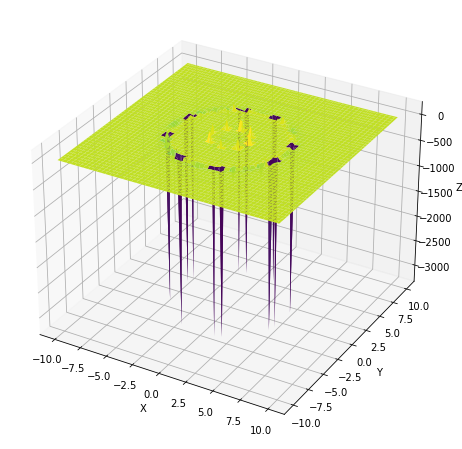

In [251]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(xx,yy,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

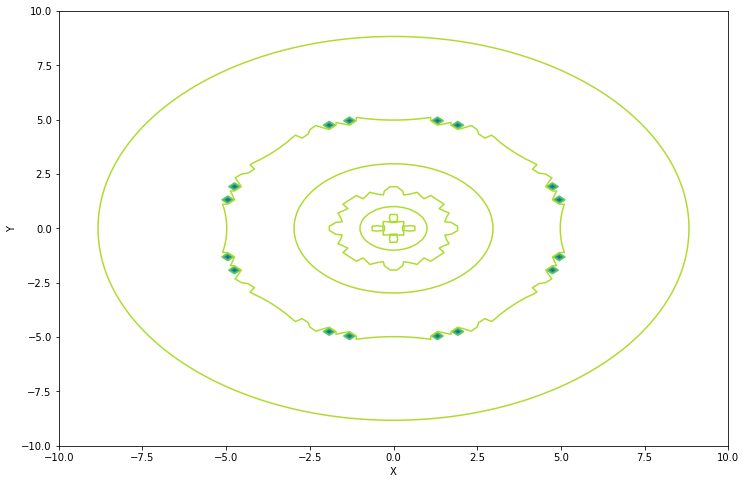

In [252]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.contour(xx,yy,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

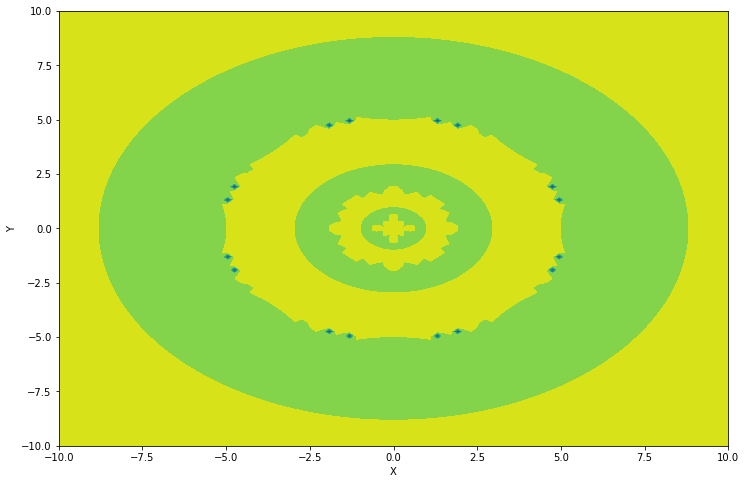

In [253]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.contourf(xx,yy,z,cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()